In [81]:
import pandas as pd  
import numpy as np
import jieba  
import re  
from gensim import corpora, models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [41]:
# 假设CSV文件名为'documents.csv'，且文本内容存储在'content'列中  
df = pd.read_csv()  

In [42]:
df.head()

,标题,日期
0,中乌联合考古揭开古丝绸之路千年遗存神秘面纱,2024/6/19
1,中尼舞者“以舞会友”促文化交流,2024/6/10
2,心相近｜这所高校为海外学子打开“中国之窗”,2024/6/4
3,“茶和天下·雅集”暨中国（广西）文化旅游推介会在科伦坡举行,2024/5/23
4,中国图书首次正式亮相多哈国际书展,2024/5/14


In [43]:
# 定义一个函数，用于去除特殊符号、标点符号等，并只保留汉字  
def clean_text(text):  
    # 使用正则表达式去除非汉字字符  
    cleaned_text = re.sub(r'[^\u4e00-\u9fa5]', '', text)  
    return cleaned_text

In [44]:
# 应用clean_text函数到'标题'列，并创建一个新的列'新标题'  
df['新标题'] = df['标题'].apply(clean_text)

In [45]:
df.head()

,标题,日期,新标题
0,中乌联合考古揭开古丝绸之路千年遗存神秘面纱,2024/6/19,中乌联合考古揭开古丝绸之路千年遗存神秘面纱
1,中尼舞者“以舞会友”促文化交流,2024/6/10,中尼舞者以舞会友促文化交流
2,心相近｜这所高校为海外学子打开“中国之窗”,2024/6/4,心相近这所高校为海外学子打开中国之窗
3,“茶和天下·雅集”暨中国（广西）文化旅游推介会在科伦坡举行,2024/5/23,茶和天下雅集暨中国广西文化旅游推介会在科伦坡举行
4,中国图书首次正式亮相多哈国际书展,2024/5/14,中国图书首次正式亮相多哈国际书展


In [46]:
# 接下来进行分词和去停用词（如果需要的话）  
def tokenize_text(text):  
    # 假设你有一个停用词文件  
    stopwords = set([line.strip() for line in open('stopwords.txt', encoding='utf-8').readlines()])  
    words = jieba.cut(text, cut_all=False)  
    filtered_words = [word for word in words if word not in stopwords and len(word) > 1]  # 排除单字符词  
    return ' '.join(filtered_words)

In [47]:
# 应用tokenize_text函数到'新标题'列，并创建一个新的列'新标题2'  
df['新标题2'] = df['新标题'].apply(tokenize_text)

In [48]:
df.head()

,标题,日期,新标题,新标题2
0,中乌联合考古揭开古丝绸之路千年遗存神秘面纱,2024/6/19,中乌联合考古揭开古丝绸之路千年遗存神秘面纱,中乌 联合 考古 揭开 丝绸之路 千年 遗存 神秘 面纱
1,中尼舞者“以舞会友”促文化交流,2024/6/10,中尼舞者以舞会友促文化交流,中尼 舞者 舞会 友促 文化交流
2,心相近｜这所高校为海外学子打开“中国之窗”,2024/6/4,心相近这所高校为海外学子打开中国之窗,相近 这所 高校 海外 学子 打开 中国 之窗
3,“茶和天下·雅集”暨中国（广西）文化旅游推介会在科伦坡举行,2024/5/23,茶和天下雅集暨中国广西文化旅游推介会在科伦坡举行,天下 雅集 中国 广西 文化 旅游 推介会 科伦坡
4,中国图书首次正式亮相多哈国际书展,2024/5/14,中国图书首次正式亮相多哈国际书展,中国 图书 首次 正式 亮相 多哈 国际 书展


# 文本数据向量化

现在，df['新标题2']包含了处理后的文本,接下来，你可以使用这个新列的数据进行LDA分析

In [49]:
df['新标题3'] = df['新标题2'].apply(lambda x: x.split()) # 需要切词之后，才可以用于gensim的向量化

In [50]:
df.head()

,标题,日期,新标题,新标题2,新标题3
0,中乌联合考古揭开古丝绸之路千年遗存神秘面纱,2024/6/19,中乌联合考古揭开古丝绸之路千年遗存神秘面纱,中乌 联合 考古 揭开 丝绸之路 千年 遗存 神秘 面纱,"[中乌, 联合, 考古, 揭开, 丝绸之路, 千年, 遗存, 神秘, 面纱]"
1,中尼舞者“以舞会友”促文化交流,2024/6/10,中尼舞者以舞会友促文化交流,中尼 舞者 舞会 友促 文化交流,"[中尼, 舞者, 舞会, 友促, 文化交流]"
2,心相近｜这所高校为海外学子打开“中国之窗”,2024/6/4,心相近这所高校为海外学子打开中国之窗,相近 这所 高校 海外 学子 打开 中国 之窗,"[相近, 这所, 高校, 海外, 学子, 打开, 中国, 之窗]"
3,“茶和天下·雅集”暨中国（广西）文化旅游推介会在科伦坡举行,2024/5/23,茶和天下雅集暨中国广西文化旅游推介会在科伦坡举行,天下 雅集 中国 广西 文化 旅游 推介会 科伦坡,"[天下, 雅集, 中国, 广西, 文化, 旅游, 推介会, 科伦坡]"
4,中国图书首次正式亮相多哈国际书展,2024/5/14,中国图书首次正式亮相多哈国际书展,中国 图书 首次 正式 亮相 多哈 国际 书展,"[中国, 图书, 首次, 正式, 亮相, 多哈, 国际, 书展]"


In [51]:
# 创建字典，将单词映射到整数ID
dictionary = corpora.Dictionary(df['新标题3'])

In [52]:
dictionary

In [53]:
# 将文本转换为词袋表示（Bag of Words）  
corpus = [dictionary.doc2bow(text) for text in df['新标题3']]
# doc_bow = dictionary.doc2bow(df['新标题3'][100])  

In [54]:
corpus[0:3]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]]

**在LDA（Latent Dirichlet Allocation）建模中，TF-IDF（Term Frequency-Inverse Document Frequency）通常不直接作为LDA的输入特征，因为LDA期望的输入是文档的原始词频（term frequencies）或者词袋表示（bag-of-words representation）。然而，TF-IDF可以在LDA建模的预处理阶段中发挥重要作用。**

## **TF-IDF的主要作用是在文档集合中评估一个词的重要性。TF-IDF值结合了词频（TF）和逆文档频率（IDF）两个因素：**

- 词频（TF）：一个词在文档中出现的次数。它衡量了词在文档内部的相对重要性。
- 逆文档频率（IDF）：一个词在文档集合中的稀有程度。它衡量了词在整个文档集合中的重要性。

## **在LDA建模之前，使用TF-IDF进行预处理可以帮助我们：**

1. 降维：通过只保留TF-IDF值较高的词，我们可以减少词典的大小，从而降低LDA建模的复杂度。
2. 过滤噪音：TF-IDF值较低的词往往是噪音或不太重要的词，它们在LDA建模中可能不会对结果产生太大影响。通过过滤这些词，我们可以提高LDA模型的质量和可解释性。
3. 加权：虽然LDA在内部会对词频进行建模，但TF-IDF可以作为一种额外的加权方案。尽管LDA不直接使用TF-IDF值作为输入，但你可以使用TF-IDF值来重新加权你的词袋表示（尽管这不是标准的LDA做法）。

然而，值得注意的是，LDA是一种无监督的主题模型，它试图发现文档集合中的潜在主题结构。LDA的建模过程会自动考虑词在文档中的出现频率（即TF），并尝试从中推断出主题。因此，在大多数情况下，直接使用未经加权的词袋表示作为LDA的输入已经足够好。

**总的来说，TF-IDF在LDA建模的预处理阶段可以作为一个有用的工具来过滤噪音和降低维度，但它通常不直接作为LDA的输入特征。**

In [55]:
# 使用TfidfModel计算TF-IDF  
tfidf = models.TfidfModel(corpus)

In [56]:
tfidf

In [57]:
# 获取某个文档的TF-IDF向量  
doc_bow = dictionary.doc2bow(df['新标题3'][100])  
doc_tfidf = tfidf[doc_bow]

# 打印TF-IDF向量  
print("TF-IDF vector for the first document:")  
for term_id, tfidf_val in doc_tfidf:  
    print(f"Word: {dictionary[term_id]}, TF-IDF: {tfidf_val}")

TF-IDF vector for the first document:
Word: 中国, TF-IDF: 0.12965875712944186
Word: 世界, TF-IDF: 0.43068908615849927
Word: 一带, TF-IDF: 0.1949319000770021
Word: 一路, TF-IDF: 0.1989641103230098
Word: 留学生, TF-IDF: 0.4440702883278191
Word: 乐队, TF-IDF: 0.7231264992543115


In [58]:
# 原始的词袋模型
corpus[2]

[(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]

In [59]:
# 转换成tfidf之后的词袋模型
tfidf[corpus][2]

[(14, 0.07123951360169188),
 (15, 0.3973135422541676),
 (16, 0.3973135422541676),
 (17, 0.3973135422541676),
 (18, 0.3206514286643856),
 (19, 0.3973135422541676),
 (20, 0.3973135422541676),
 (21, 0.3206514286643856)]

**上面的两种形式，都可以用作后面的LDA建模，只是两种不同的向量表示形式**

# 确定最佳主题数目

## 一致性得分计算

In [60]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10, chunksize=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [61]:
# 设置主题数目的范围
start, limit, step = 2, 20, 1

In [62]:
# 计算一致性值
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=tfidf[corpus], 
                                                        texts=df['新标题3'], 
                                                        start=start, limit=limit, step=step)

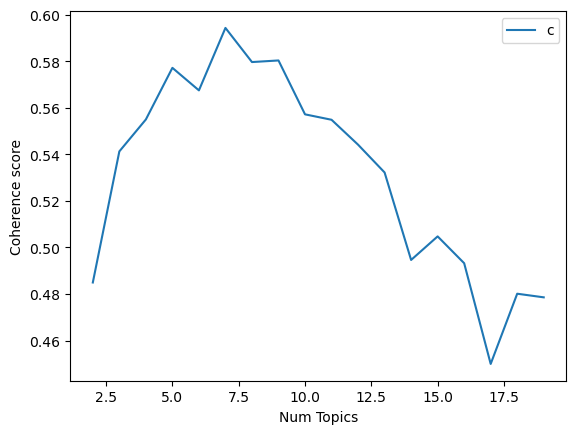

最佳主题数目： 7


In [63]:
# 绘制一致性值
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# 打印最佳主题数目的模型
optimal_model = model_list[coherence_values.index(max(coherence_values))]
optimal_num_topics = start + coherence_values.index(max(coherence_values)) * step
print("最佳主题数目：", optimal_num_topics)

## 计算困惑度得分

In [64]:
def compute_perplexity_values(dictionary, corpus, texts, limit, start=2, step=1):
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10, chunksize=100)
        model_list.append(model)
        perplexity_values.append(model.log_perplexity(corpus))
    return model_list, perplexity_values

In [65]:
# 计算困惑度值
model_list, perplexity_values = compute_perplexity_values(dictionary=dictionary, 
                                                          corpus=tfidf[corpus], 
                                                          texts=df['新标题3'], 
                                                          start=start, limit=limit, step=step)

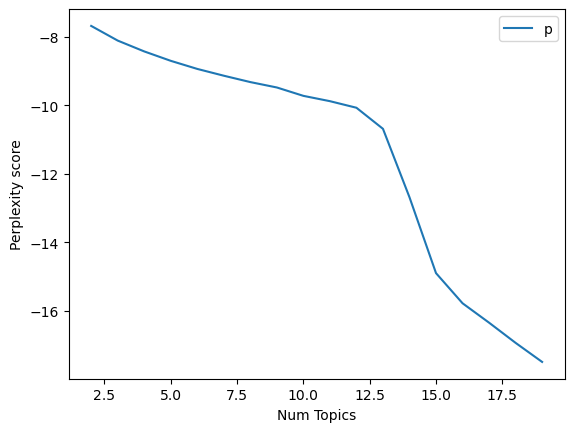

最佳主题数目： 19


In [66]:
# 绘制困惑度值
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

# 打印困惑度最低的模型
optimal_model = model_list[perplexity_values.index(min(perplexity_values))]
optimal_num_topics = start + perplexity_values.index(min(perplexity_values)) * step
print("最佳主题数目：", optimal_num_topics)

# 正式构建LDA主题模型

In [67]:
# 设置LDA模型的参数  
num_topics = 7  # 假设我们想要找到10个主题  
passes = 10       # 通过语料库的次数，用于训练模型  
chunksize = 100  # 一次性处理的文档数量，用于优化内存使用  
random_state = 42 # 随机种子，确保结果可复现

In [68]:
# 训练LDA模型  使用的是tfidf[corpus]，也就是tfidf之后的，而非简单的词频形式语料库
lda_model = models.LdaModel(corpus=tfidf[corpus], id2word=dictionary, num_topics=num_topics, passes=passes, chunksize=chunksize, random_state=random_state)

In [69]:
# 输出每个主题的前N个最重要的单词  
def print_topics(model, num_topics, num_words):  
    for i, topic in enumerate(model.print_topics(num_topics=num_topics, num_words=num_words)):  
        print(f"Topic {i+1}: {topic}")

In [70]:
# 打印每个主题的前10个最重要的单词  
print_topics(lda_model, num_topics, 10)

Topic 1: (0, '0.012*"艺术" + 0.010*"开幕" + 0.009*"合作" + 0.008*"丝绸之路" + 0.007*"图片展" + 0.007*"出版" + 0.007*"曼谷" + 0.007*"京剧" + 0.006*"非洲" + 0.006*"尼泊尔"')
Topic 2: (1, '0.009*"倡议" + 0.007*"艺术节" + 0.007*"高校" + 0.007*"启动" + 0.007*"中国" + 0.007*"文化交流" + 0.006*"助推" + 0.006*"舞蹈" + 0.006*"建设者" + 0.006*"香港"')
Topic 3: (2, '0.011*"电影节" + 0.010*"一路" + 0.010*"一带" + 0.009*"国际" + 0.009*"通讯" + 0.009*"马来西亚" + 0.008*"沿线" + 0.008*"上海" + 0.007*"传统" + 0.006*"发展"')
Topic 4: (3, '0.019*"活动" + 0.016*"丝路" + 0.012*"亮相" + 0.012*"文化" + 0.010*"故事" + 0.009*"中国" + 0.008*"举办" + 0.007*"一路" + 0.007*"一带" + 0.007*"艺术家"')
Topic 5: (4, '0.016*"论坛" + 0.009*"泰国" + 0.008*"文化交流" + 0.008*"连线" + 0.008*"历史" + 0.007*"命运" + 0.007*"全球" + 0.007*"生肖" + 0.007*"发行" + 0.007*"举办"')
Topic 6: (5, '0.016*"一路" + 0.015*"一带" + 0.011*"电影" + 0.011*"走进" + 0.009*"中国" + 0.009*"比赛" + 0.008*"第三届" + 0.008*"中文" + 0.008*"文化论坛" + 0.008*"汉语"')
Topic 7: (6, '0.009*"铁路" + 0.008*"青年" + 0.008*"大型" + 0.008*"图书" + 0.008*"国际" + 0.006*"中老" + 0.006*"首尔" + 0.006*"汉学家" + 

In [71]:
# 如果你想查看特定文档的主题分布，可以这样做：  
doc_bow = dictionary.doc2bow(df['新标题3'][100])  # 假设你想看第一个文档的主题分布  
doc_lda = lda_model[doc_bow]  
print(doc_lda)

[(0, 0.020424178), (1, 0.020424498), (2, 0.020431029), (3, 0.020446545), (4, 0.020430995), (5, 0.877426), (6, 0.020416763)]


In [73]:
df['新标题'][100]

'留学生一带一路乐队把中国唱给世界听'

# 获取主题-文档矩阵

In [85]:
# 获取主题-文档矩阵
doc_topic_matrix = []
for doc_bow in corpus:
    doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0)
    doc_topic_matrix.append([prob for _, prob in doc_topics])

In [86]:
# 将矩阵转换为 DataFrame
doc_topic_df = pd.DataFrame(doc_topic_matrix)
doc_topic_df.columns = [f"Topic_{i}" for i in range(num_topics)]
doc_topic_df.index = df.index

In [87]:
doc_topic_df.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
0,0.251439,0.014292,0.014361,0.014311,0.677011,0.014294,0.014292
1,0.023814,0.857085,0.023814,0.023814,0.023846,0.023814,0.023814
2,0.015885,0.904685,0.015880,0.015890,0.015884,0.015893,0.015883
3,0.592153,0.015891,0.015884,0.015914,0.015930,0.328345,0.015882
4,0.015886,0.015887,0.015894,0.169455,0.015891,0.015893,0.751095


# 获取主题-关键词矩阵

In [88]:
# 获取主题-关键词矩阵
topic_word_matrix = []
for topic_id in range(num_topics):
    topic_terms = lda_model.get_topic_terms(topic_id, topn=len(dictionary))
    topic_word_matrix.append([prob for _, prob in topic_terms])

In [89]:
# 将矩阵转换为 DataFrame
topic_word_df = pd.DataFrame(topic_word_matrix)
topic_word_df.columns = [dictionary[i] for i in range(len(dictionary))]
topic_word_df.index = [f"Topic_{i}" for i in range(num_topics)]

In [93]:
# topic_word_df

# 确定每一个文档概率最高的主题是什么

In [76]:
# 计算每个文档的主题概率分布
doc_topic_dists = []
for doc_bow in corpus:
    doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0)
    doc_topic_dists.append(doc_topics)

In [77]:
# 确定每个文档的主要主题
main_topics = [max(doc_topics, key=lambda x: x[1])[0] for doc_topics in doc_topic_dists]

In [78]:
# 将主要主题添加到数据框中
df['主要主题'] = main_topics

In [79]:
df.head()

,标题,日期,新标题,新标题2,新标题3,主要主题
0,中乌联合考古揭开古丝绸之路千年遗存神秘面纱,2024/6/19,中乌联合考古揭开古丝绸之路千年遗存神秘面纱,中乌 联合 考古 揭开 丝绸之路 千年 遗存 神秘 面纱,"[中乌, 联合, 考古, 揭开, 丝绸之路, 千年, 遗存, 神秘, 面纱]",4
1,中尼舞者“以舞会友”促文化交流,2024/6/10,中尼舞者以舞会友促文化交流,中尼 舞者 舞会 友促 文化交流,"[中尼, 舞者, 舞会, 友促, 文化交流]",1
2,心相近｜这所高校为海外学子打开“中国之窗”,2024/6/4,心相近这所高校为海外学子打开中国之窗,相近 这所 高校 海外 学子 打开 中国 之窗,"[相近, 这所, 高校, 海外, 学子, 打开, 中国, 之窗]",1
3,“茶和天下·雅集”暨中国（广西）文化旅游推介会在科伦坡举行,2024/5/23,茶和天下雅集暨中国广西文化旅游推介会在科伦坡举行,天下 雅集 中国 广西 文化 旅游 推介会 科伦坡,"[天下, 雅集, 中国, 广西, 文化, 旅游, 推介会, 科伦坡]",0
4,中国图书首次正式亮相多哈国际书展,2024/5/14,中国图书首次正式亮相多哈国际书展,中国 图书 首次 正式 亮相 多哈 国际 书展,"[中国, 图书, 首次, 正式, 亮相, 多哈, 国际, 书展]",6


# 获取每个主题的前五个代表性文档

In [82]:
# 获取每个主题的前五个代表性文档
top_docs_per_topic = {}
for topic_idx in range(num_topics):
    # 获取当前主题的所有文档概率
    topic_probs = [dict(doc_topics).get(topic_idx, 0) for doc_topics in doc_topic_dists]
    # 获取概率最高的前五个文档索引
    top_doc_indices = np.argsort(topic_probs)[-5:][::-1]
    top_docs_per_topic[topic_idx] = top_doc_indices

In [84]:
# 打印每个主题的前五个代表性文档
for topic_idx, doc_indices in top_docs_per_topic.items():
    print(f"主题#{topic_idx}的前五个代表性文档:")
    for doc_index in doc_indices:
        print(f"文档索引: {doc_index}, 标题: {df['标题'][doc_index]}")
    print()

主题#0的前五个代表性文档:
文档索引: 254, 标题: 新华社－伊通社联合图片展在德黑兰开幕
文档索引: 266, 标题: 用西方艺术语言诠释东方艺术神韵
文档索引: 88, 标题: 韶华岁月献给中欧合作事业
文档索引: 241, 标题: 中国艺术名家书画展在曼谷开幕
文档索引: 55, 标题: 中非经贸博览会：留学生志愿者带你看非洲

主题#1的前五个代表性文档:
文档索引: 2, 标题: 心相近｜这所高校为海外学子打开“中国之窗”
文档索引: 107, 标题: 全球连线丨第三次中国与克罗地亚警务联巡启动
文档索引: 177, 标题: 中国油画家安曼参展助推“一带一路”文化交流
文档索引: 14, 标题: 马达加斯加教师：“一带一路”倡议让我延续中国情缘
文档索引: 144, 标题: 原创舞蹈诗剧《天下大同》在国家大剧院上演

主题#2的前五个代表性文档:
文档索引: 231, 标题: “一带一路·唱响未来”国际华人合唱大赛在吉隆坡举行
文档索引: 170, 标题: 《“一带一路”税收（英文）》期刊创刊加强税务国际交流合作
文档索引: 155, 标题: 中哈合拍“一带一路”纪录片《你好，哈萨克斯坦》在哈播出
文档索引: 77, 标题: 通讯：迪拜世博城迎来2023“欢乐春节”大巡游
文档索引: 103, 标题: 通讯：中马铁路人才培训合作计划开花结果

主题#3的前五个代表性文档:
文档索引: 78, 标题: 沙特利雅得世界大道“中国城”首次举办春节活动
文档索引: 101, 标题: 外国人眼中的西安:古老与现代交汇、东西方文化交融
文档索引: 51, 标题: 中企参建"地铁学校"在哥伦比亚首都波哥大"开课"
文档索引: 204, 标题: “中餐繁荣”活动将经典鲁菜带入比利时
文档索引: 57, 标题: 《丝路情长——来自好客山东的旋律》亮相科威特

主题#4的前五个代表性文档:
文档索引: 31, 标题: 通讯：中企饮用水处理项目让巴西民众摆脱苦咸水
文档索引: 6, 标题: 培养更强竞争力——探访卢旺达“鲁班工坊”
文档索引: 123, 标题: 全球连线 | 泰国华人潮剧演员的“戏剧人生”
文档索引: 113, 标题: 全球连线｜我在中国乐业：西亚阿鲤“东游记”
文档索引: 64, 标题: 携手并肩 助力构建中国—中亚命运共同体

主题#5的前五个代表性文

# 使用 PyLDAvis 可视化 gensim 的 LDA 模型

In [94]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [96]:
# 可视化
vis = gensimvis.prepare(lda_model, corpus, dictionary)
# 在 Jupyter Notebook 中显示
pyLDAvis.display(vis)